# TP numéro 2: Manipulation d'images

## Introduction

Nous allons dans ce TP manipuler des images au format PPM et plus spécifiquement le sous-format P3 pour les images couleurs. 

L'avantage pour nous de ce format est que les images sont enregistrées sur le disque comme des fichiers textes (donc encodés en ASCII sur le disque).

Ceci en fait un format peu utilisé en réalité car la place de chaque image sur le disque est importante. C'est néanmoins un format existant.


Maintenant vous allez commencer par regarder le contenu d'un fichier .ppm. Pour cela, dans le dossier *pict* sur votre gauche vous trouverez un fichier nommé *mini_damier.ppm*. 

Il s'agit d'un fichier ppm minimal qui représente une image de 4 pixels seulement. 2 pixels de large sur 2 pixels de haut.

Faites un clic droit dessus et choisissez *download*. Cela télécharge le fichier sur le disque dur de la machine que vous êtes en train d'utiliser.

Ouvrez le fichier en cliquant simplement dessus. Au besoin, zoomez beaucoup car l'image est vraiment petite. Vous devriez voir un quatre pixels, deux nois et deux blancs en quinconce.

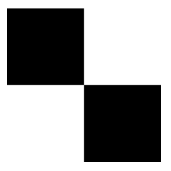

Voici le contenu du fichier:
>   P3</br>
>   2 2 255</br>
>   0 0 0</br>
>   255 255 255</br>
>   255 255 255</br>
>   0 0 0</br>

Vous voyez que le fichier commence par le sous format ppm utilisé (i.e., P3). On a ensuite 3 entiers dont les deux premiers représentent la largeur et la hauteur de l'image. Le troisième ne sera pas utilisé et toujours à 255.
Ensuite, chaque triplet de valeur représente les valeurs R, G et B d'un pixel.

Vous pouvez maintenant ouvrir le fichier avec un éditeur de texte et modifier les deux pixels blancs par des gris moyen, c'est à dire obtenir le fichier suivant:
>   P3</br>
>   2 2 255</br>
>   0 0 0</br>
>   127 127 127</br>
>   127 127 127</br>
>   0 0 0</br>

Si vous regardez à nouveau l'image résultante vous aurez l'image suivante:

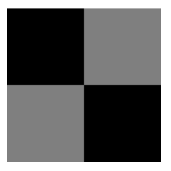

Bien sûr, notre but n'est pas de modifier les fichiers à la main mais de le faire en écrivant un algorithme en python.

## chargement et affichage d'images ppm

Afin de pouvoir manipuler plus facilement des images ppm, vous allez importer le module iiwHelper que je vous fournis avec le sujet. Pour ceci exécuter la cellule ci dessous.

In [2]:
import cv2
from iiwHelper import *

La cellule précédente fournit des informations utiles utilisées dans les deux cellules suivantes. 

Comprenez les cellules suivantes avant de continuer. 

Vous pouvez bien sûr les exécuter pour voir ce qu'elles font.

Rappel: la manière de définir le chemin vers un fichier a été abordée dans le cours #3

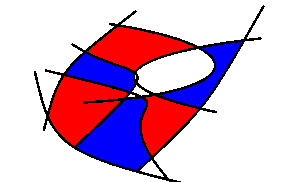

In [2]:
showImageFromPath('./pict/Oeuvre_d_art.ppm')




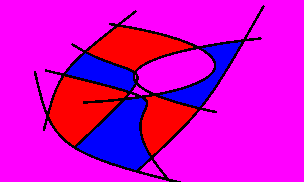

In [3]:
img :ImagePPM = loadImage("./pict/Oeuvre_d_art.ppm")

index: int = int(0)

while (index < len(img.pixels)):
    p: Pixel = img.pixels[index]
    p.g = 0
    index = index + 1

showImage(img)
saveImage(img,"./pict/modified/Oeuvre_d_art2.ppm")

Dans la celulle précédente, la fonction *loadImage* renvoie une image de type ImagePPM. Le type ImagePPM est tel que:

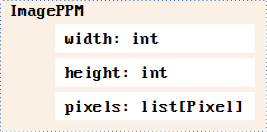

où le type Pixel est définit tel que

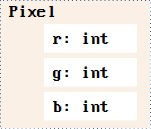

Soit en Python, le code suivant:

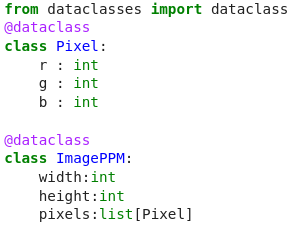

Expliquer ce que fait la cellule **précédente**. Modifiez là et regardez l'impact de vos modifications

## Changement de couleurs

### niveaux de gris

Soit la variable *img* de type *ImagePPM* obtenue ligne 1 du code ci dessous.

Écrire un algorithme permettant transformer l'image en niveaux de gris. Plus précisément, pour chaque pixel $p \in pixels$, changer la valeur de ses variables internes  *r*,*g* et *b* par une même valeur *v* obtenue par la formule suivante: $v = 0,2126 * p.r + 0,7152 * p.g + 0,0722 * p.b$

note: n'importe quel triplet r,g,b dont la valeur est la même donne un gris. Dans la formule ci dessus on prend en compte le fait que certaines couleurs sont plus ou moins importante pour former un gris représentatif. Vous auriez pu faire juste la moyenne des trois valeurs r,g,b originales. Testez et comparez les deux techniques 

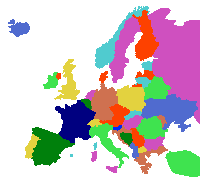

In [3]:
img :ImagePPM = loadImage("./pict/EU_propre_little.ppm")

#ajoutez votre code ici

showImage(img)

### logo de différentes couleurs

Le logo de l'unité pédagogique d'informatique est le suivant (./pict/logo.ppm):

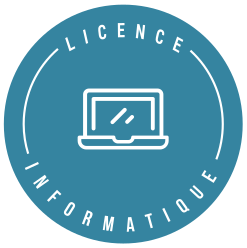

1) trouvez un moyen de récupérer la valeur du bleu utilisée dans l'image
2) Écrire un algorithme permettant de modifiez tous les pixels de couleurs bleu de l'image par une autre couleur de votre choix

Si le remplacement marche mal (i.e., ne remplace pas tous les pixels souhaités, comprenez pourquoi et modifiez votre algorithme en conséquence.

In [5]:
#ajoutez votre code ici

## Image brouillée


On dispose d'une image au contenu inconnu (./pict/enigme.ppm). Les quantités de Rouge/Vert/Bleu ont été déformées, ce qui cache la vraie image.
Vous allez écrire du code pour réparer les pixels et retrouver l'image de départ. L'image brouillée est la suivante:

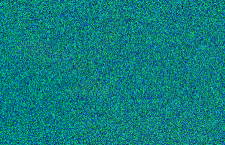

les valeurs de Vert et de Bleu sont des valeurs aléatoires entre 0 et 255 (ce qui provoque l'effet de neige),toutes les données pertinentes de l'image sont contenues dans la composante Rouge, en outre, toutes les valeurs de Rouge ont été assombries en les divisant par 10.

#### partie 1
Écrire un algorithme qui permet de retrouver l'image originale et de l'afficher.


#### partie 2
Une fois l'image affichée vous verrez que l'image obtenue précédemment est toute rouge. On a comme une image en niveaux de gris, mais montrée dans l'intervalle noir-rouge. Modifiez votre algorithme pour permettre d'avoir l'image en niveaux de gris



In [6]:
#ajoutez votre code ici


## incrustation d'image

Soient 2 images $decor$ et $incrust$ ayant exactement la même largeur et hauteur. L'image décor est un décor quelquconque, par exemple le parc de valrose ci dessous (./pict/valrose.ppm):

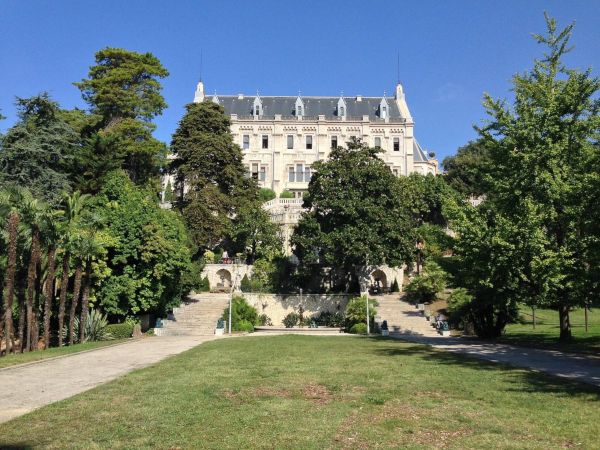</img>

On désir incruster les parties importantes de l'image $incrust$ dans le décor. L'image $incrust$ comprend des pixels blanc qui ne sont pas importants et d'autres que l'on désir incruster. Par exemple l'une des images suivantes (./pict/lapin.ppm ou ./pict/raptor.ppm):

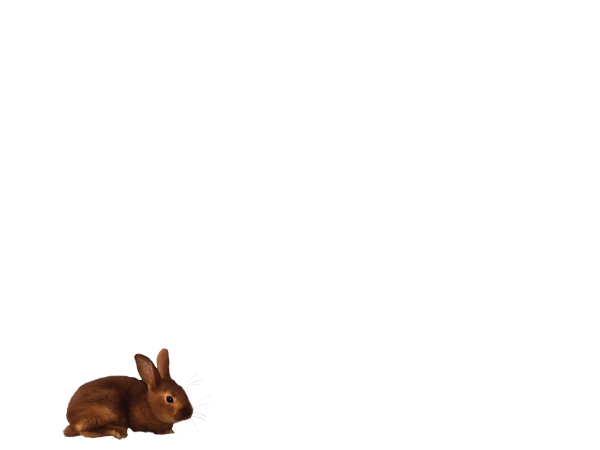</img> 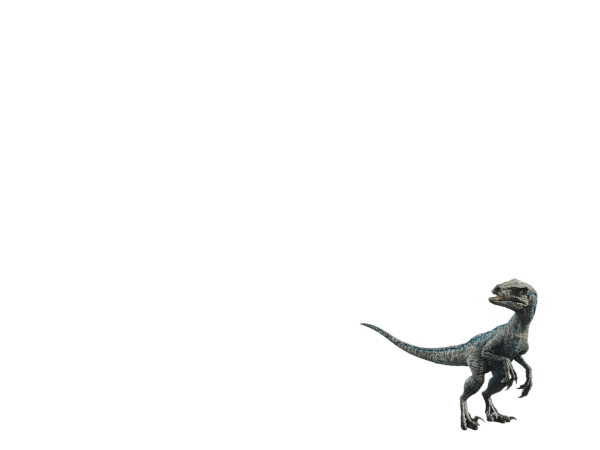</img>

Écrire un algorithme permettant d'incruster les parties non blanches de l'image $incrust$ dans l'image $decor$ 

In [7]:
#ajoutez votre code ici


## Codage/décodage d'image

On désire coder une image afin que son affichage ne permette plus d'en connaitre le contenu original. Cependant on veut pouvoir retrouver l'image originale. Proposez un algorithme pour coder et décoder une image en jouant sur les valeurs de r, g et b.


In [8]:
#ajoutez votre code ici


## Éclaircissement bords d'image


Écrire un algorithme permettant de modifier les pixels se trouvant sur les bords de l'image. Plus précisément, pour tous les pixels étant à une distance inférieure à 20 d'un bord de l'image, on désir appliquer un éclaircissement de celui-ci. Pour éclaircir un pixel, nous allons augmenter la valeur de chacune de ses variables internes $r, g, b$ de 140; tout en s'assurant de ne pas dépasser 255.


In [9]:
img :Image = loadImage("./pict/US_propre.ppm")

